### import libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### import data

In [9]:
df=pd.read_csv(r"flood.csv")
print(df)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   46        3.0              1        23.0     0.0   
4        0   43        2.0              0         0.0     0.0   
...    ...  ...        ...            ...         ...     ...   
2696     1   45        4.0              1        43.0     0.0   
2697     1   43        4.0              1        20.0     0.0   
2698     1   58        3.0              0         0.0     0.0   
2699     1   51        3.0              1        43.0     0.0   
2700     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2701 entries, 0 to 2700
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             2701 non-null   int64  
 1   age              2701 non-null   int64  
 2   education        2701 non-null   float64
 3   currentSmoker    2701 non-null   int64  
 4   cigsPerDay       2701 non-null   float64
 5   BPMeds           2701 non-null   float64
 6   prevalentStroke  2701 non-null   int64  
 7   prevalentHyp     2701 non-null   int64  
 8   diabetes         2701 non-null   int64  
 9   totChol          2701 non-null   float64
 10  sysBP            2701 non-null   float64
 11  diaBP            2701 non-null   float64
 12  BMI              2701 non-null   float64
 13  heartRate        2701 non-null   float64
 14  glucose          2701 non-null   float64
 15  TenYearCHD       2701 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 337.8 KB


#### Data cleaning

#### check duplicates

In [11]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
2696    False
2697    False
2698    False
2699    False
2700    False
Length: 2701, dtype: bool


In [12]:
df.dropna(inplace=True)

#### Remove outliers

#### Boxplot

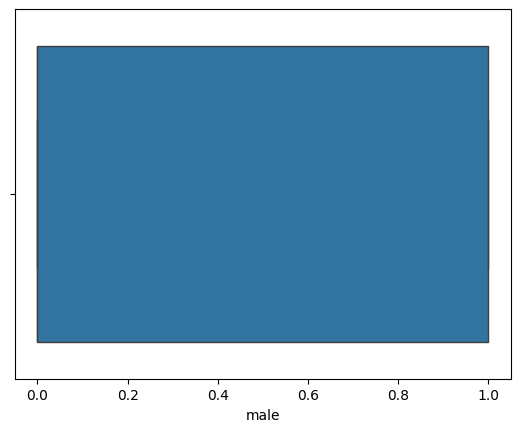

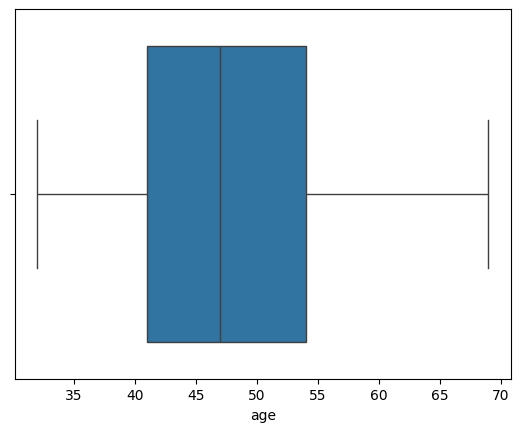

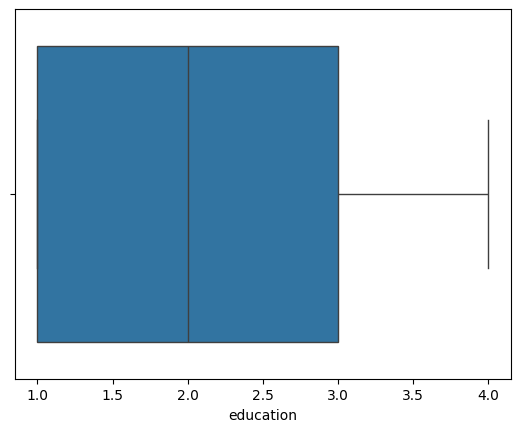

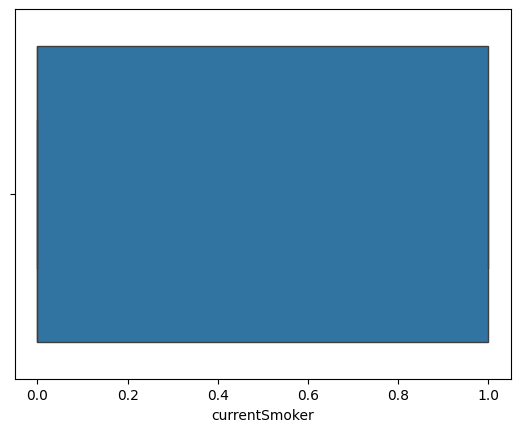

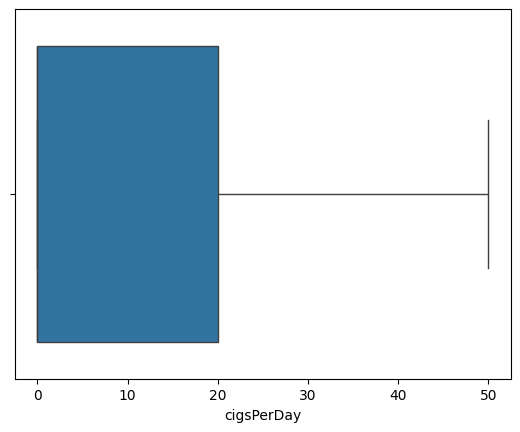

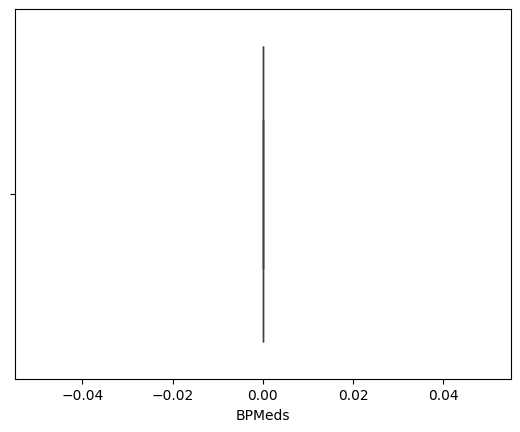

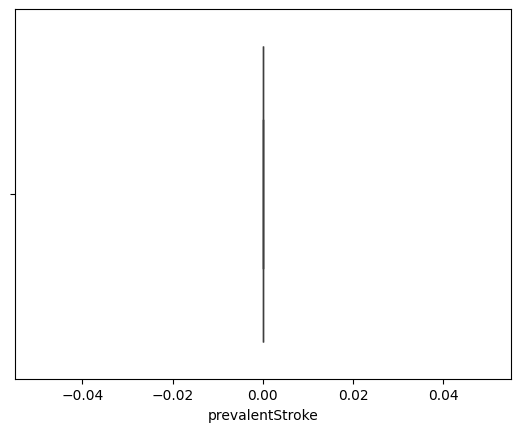

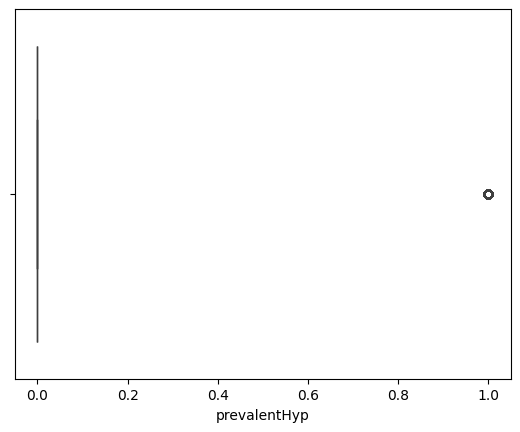

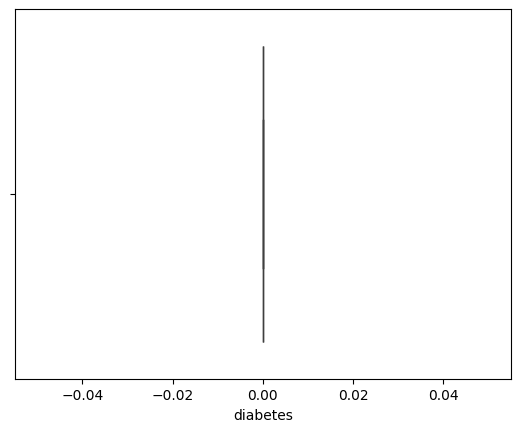

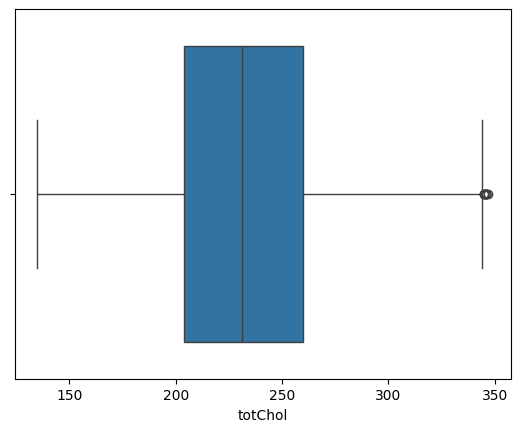

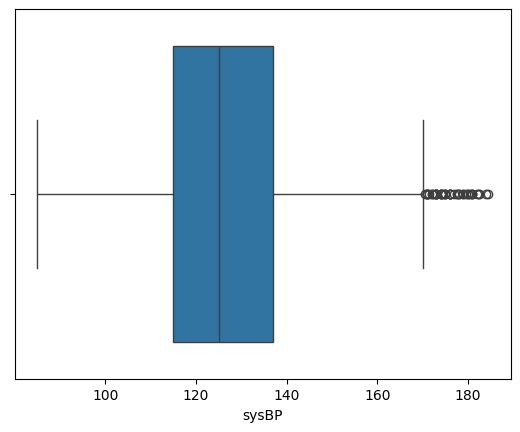

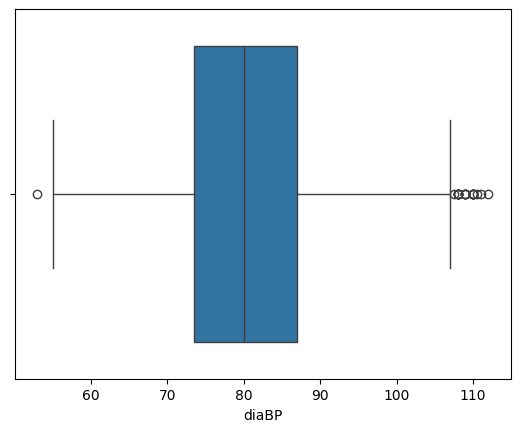

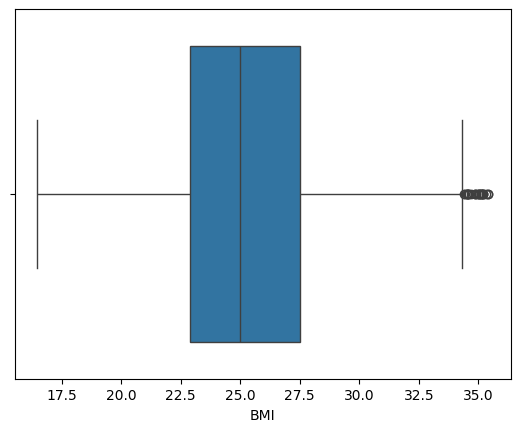

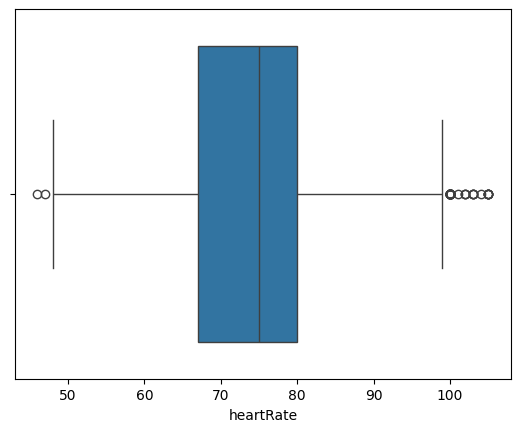

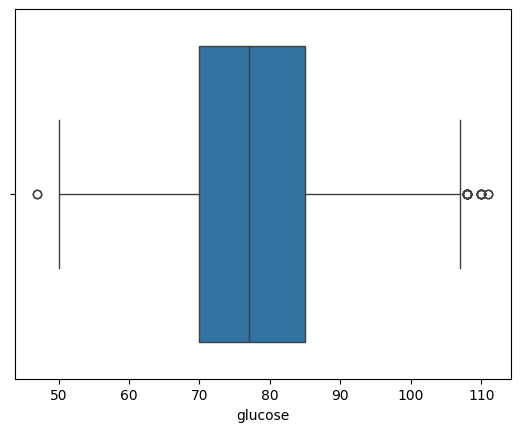

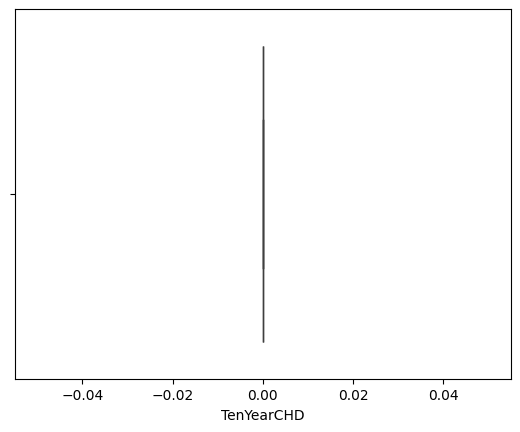

In [ ]:
import seaborn as sns
for i in df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

#### scatterplot

In [ ]:
sns.scatterplot(x="MonsoonIntensity",y="FloodProbability",data=df)

ValueError: Could not interpret value `MonsoonIntensity` for `x`. An entry with this name does not appear in `data`.

#### encodeing

In [ ]:
# categ_col = df.select_dtypes(include=['object']).columns

# # Initialize encoders
# label_encoder = LabelEncoder()

# # Encode each categorical column using Label Encoding for simplicity
# encoded_data = df.copy()
# for i in categ_col:
#     encoded_data[i] = label_encoder.fit_transform(df[i])

# # Display the first 5 rows of the encoded dataset
# print(encoded_data)

In [ ]:
x=df.iloc[:,  :20].values #indep
y=df['FloodProbability'] #dep

#### Extract dependent and independent variable

                                 MonsoonIntensity  TopographyDrainage  \
MonsoonIntensity                         1.000000           -0.003470   
TopographyDrainage                      -0.003470            1.000000   
RiverManagement                          0.002247            0.002492   
Deforestation                           -0.005384            0.002046   
Urbanization                             0.005092            0.000116   
ClimateChange                            0.005959           -0.002288   
DamsQuality                              0.002790           -0.004472   
Siltation                               -0.003191            0.010675   
AgriculturalPractices                    0.002723           -0.004550   
Encroachments                           -0.003723           -0.007272   
IneffectiveDisasterPreparedness          0.002358            0.001328   
DrainageSystems                         -0.000118           -0.001608   
CoastalVulnerability                    -0.004600  

<Axes: >

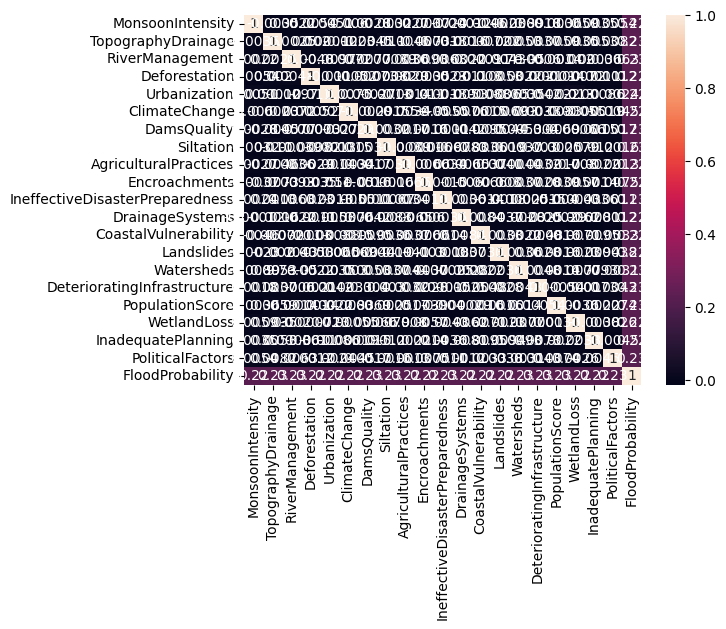

In [ ]:
corre=df.corr(numeric_only=True)
print(corre)
sns.heatmap(corre,annot=True)

#### Split Train and Test Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#### Build model

In [ ]:
# Fitting the MLR model to the training set
model = LinearRegression()
model.fit(x_train, y_train)

# Predicting the test set result
y_pred = model.predict(x_test)

# To compare the actual output values for X_test with the predicted value
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(data)

       Actual  Predicted
33553   0.455      0.455
9427    0.495      0.495
199     0.470      0.470
12447   0.460      0.460
39489   0.465      0.465
...       ...        ...
28567   0.475      0.475
25079   0.520      0.520
18707   0.505      0.505
15200   0.620      0.620
5857    0.435      0.435

[10000 rows x 2 columns]


In [ ]:
accuracy=r2_score(y_test,y_pred)*100
print(accuracy)

100.0
